In [1]:
%cd ../..

c:\Boyko Boev\Stock-Market-Prediction\src


In [2]:
from lstm_normalize import prepare_data, add_indicators, normalize_data, prepare_sequences, prepare_tensors, split_train_and_test_data, get_lstm_data
from utils.chart import config_chart
from constants import SP500_TICKER

---

## For **prepare_data** function

In [3]:
data = prepare_data(SP500_TICKER)
data

,Open,High,Low,Close
Date,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971
...,...,...,...,...
2024-01-25,4886.660156,4898.149902,4869.339844,4894.160156
2024-01-26,4888.910156,4906.689941,4881.470215,4890.970215
2024-01-29,4892.950195,4929.310059,4887.399902,4927.930176


In [4]:
data.dtypes

Open     float64
High     float64
Low      float64
Close    float64
dtype: object

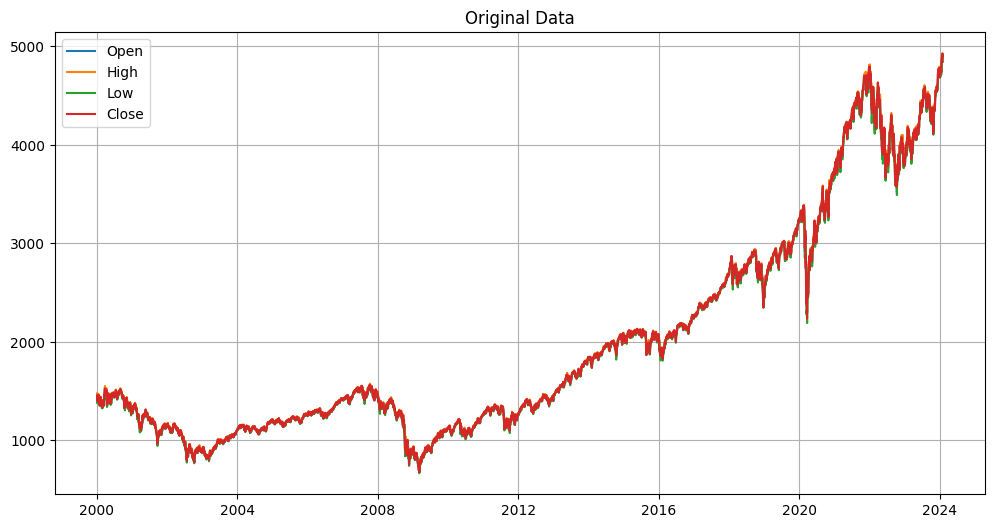

In [5]:
plt = config_chart('Original Data')
plt.plot(data)
plt.legend(['Open', 'High', 'Low', 'Close'])

---

## For **add_indicators** function

In [6]:
extended_data = add_indicators(data)
extended_data

,Open,High,Low,Close,MA25,MA50
Date,,,,,,
2000-03-14,1383.619995,1395.150024,1359.150024,1359.150024,1380.350396,1402.248999
2000-03-15,1359.150024,1397.989990,1356.989990,1392.140015,1378.367197,1400.987400
2000-03-16,1392.150024,1458.469971,1392.150024,1458.469971,1380.237598,1402.168398
2000-03-17,1458.469971,1477.329956,1453.319946,1464.469971,1382.143198,1403.415598
2000-03-20,1464.469971,1470.300049,1448.489990,1456.630005,1384.923599,1404.479199
...,...,...,...,...,...,...
2024-01-25,4886.660156,4898.149902,4869.339844,4894.160156,4775.296465,4677.269023
2024-01-26,4888.910156,4906.689941,4881.470215,4890.970215,4780.200469,4686.857432
2024-01-29,4892.950195,4929.310059,4887.399902,4927.930176,4789.383672,4695.502031


In [7]:
# plt = config_chart('RSI Indicator')
# plt.plot(extended_data['RSI'])
# plt.legend(['RSI'])

In [8]:
# plt = config_chart('Simple Moving Average')
# plt.plot(extended_data['SMA'])
# plt.legend(['SMA'])

---

## For **normalize_data** function

In [9]:
normalized_data = normalize_data(extended_data)
normalized_data

,Open,High,Low,Close,MA25,MA50
Date,,,,,,
2000-03-14,0.234480,0.236643,0.229890,0.229890,0.233867,0.237975
2000-03-15,0.229890,0.237176,0.229484,0.236079,0.233495,0.237738
2000-03-16,0.236080,0.248522,0.236080,0.248522,0.233846,0.237960
2000-03-17,0.248522,0.252061,0.247556,0.249648,0.234203,0.238194
2000-03-20,0.249648,0.250742,0.246650,0.248177,0.234725,0.238393
...,...,...,...,...,...,...
2024-01-25,0.891665,0.893820,0.888415,0.893072,0.870773,0.852382
2024-01-26,0.892087,0.895422,0.890691,0.892473,0.871693,0.854181
2024-01-29,0.892845,0.899666,0.891804,0.899407,0.873415,0.855803


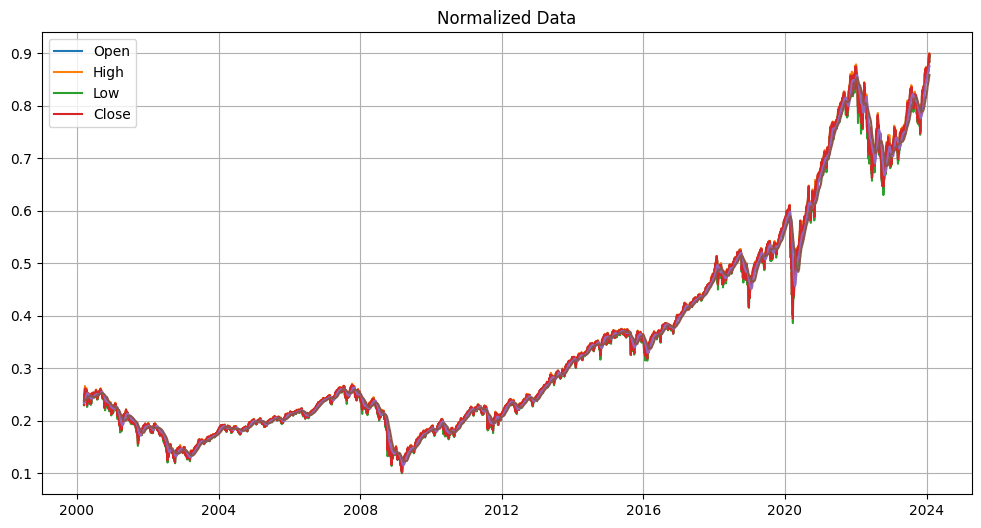

In [10]:
plt = config_chart('Normalized Data')
plt.plot(normalized_data)
plt.legend(['Open', 'High', 'Low', 'Close'])

----

## For **prepare_sequences** function

In [11]:
x, y, x_dates, y_dates = prepare_sequences(normalized_data)

In [12]:
x.shape, y.shape, x_dates.shape, y_dates.shape

((5988, 15, 6), (5988, 5, 1), (5988, 15), (5988, 5))

In [13]:
y

array([[[0.25394415],
        [0.25656497],
        [0.25938091],
        [0.2571503 ],
        [0.25642427]],

       [[0.25656497],
        [0.25938091],
        [0.2571503 ],
        [0.25642427],
        [0.25015456]],

       [[0.25938091],
        [0.2571503 ],
        [0.25642427],
        [0.25015456],
        [0.24515303]],

       ...,

       [[0.88486792],
        [0.88752625],
        [0.88826723],
        [0.89307184],
        [0.89247339]],

       [[0.88752625],
        [0.88826723],
        [0.89307184],
        [0.89247339],
        [0.89940723]],

       [[0.88826723],
        [0.89307184],
        [0.89247339],
        [0.89940723],
        [0.89885193]]])

In [14]:
y[0], y_dates[0]

(array([[0.25394415],
        [0.25656497],
        [0.25938091],
        [0.2571503 ],
        [0.25642427]]),
 array(['2000-04-05T00:00:00.000000000', '2000-04-06T00:00:00.000000000',
        '2000-04-07T00:00:00.000000000', '2000-04-10T00:00:00.000000000',
        '2000-04-11T00:00:00.000000000'], dtype='datetime64[ns]'))

In [15]:
x[0], x_dates[0]

(array([[0.22988956, 0.2371761 , 0.22948433, 0.23607862, 0.23349478,
         0.23773842],
        [0.2360805 , 0.24852239, 0.2360805 , 0.24852239, 0.23384568,
         0.23795998],
        [0.24852239, 0.2520606 , 0.24755622, 0.24964801, 0.23420317,
         0.23819396],
        [0.24964801, 0.25074176, 0.2466501 , 0.2481772 , 0.23472479,
         0.2383935 ],
        [0.2481772 , 0.25517296, 0.24619424, 0.25516358, 0.2355047 ,
         0.23859011],
        [0.25516358, 0.25726661, 0.25393664, 0.25643366, 0.23624453,
         0.2387516 ],
        [0.25643366, 0.26241072, 0.25488593, 0.26144456, 0.23729271,
         0.23908474],
        [0.26144456, 0.26623222, 0.25947096, 0.26146519, 0.23833729,
         0.23944198],
        [0.26146519, 0.26281032, 0.25977675, 0.26078982, 0.23967131,
         0.23972031],
        [0.26078982, 0.26144643, 0.2576437 , 0.25776377, 0.24083865,
         0.23988007],
        [0.25776377, 0.26033769, 0.25583519, 0.25791198, 0.24194799,
         0.24008036],

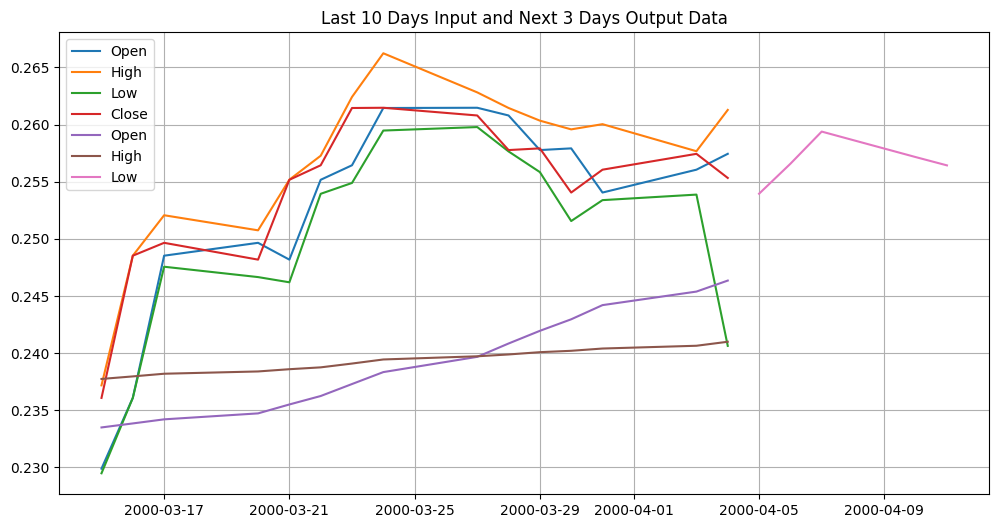

In [16]:
plt = config_chart('Last 10 Days Input and Next 3 Days Output Data')
plt.plot(x_dates[0], x[0])
plt.plot(y_dates[0], y[0])
plt.legend(['Open', 'High', 'Low', 'Close', 'Open', 'High', 'Low', 'Close'])


---

## For **split_train_and_test_data** function

In [17]:
train, test, predict = split_train_and_test_data(x, y, x_dates, y_dates)

In [18]:
train['x'].shape,  train['x_dates'].shape, train['y'].shape,  train['y_dates'].shape

((4790, 15, 6), (4790, 15), (4790, 5, 1), (4790, 5))

In [19]:
test['x'].shape, test['x_dates'].shape, test['y'].shape, test['y_dates'].shape

((599, 15, 6), (599, 15), (599, 5, 1), (599, 5))

In [20]:
predict['x'].shape, predict['x_dates'].shape, predict['y'].shape, predict['y_dates'].shape

((599, 15, 6), (599, 15), (599, 5, 1), (599, 5))

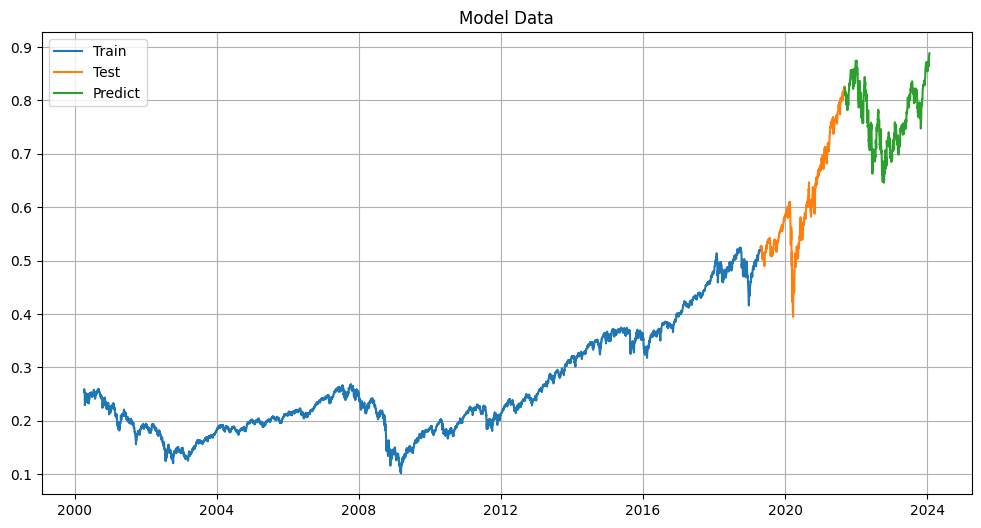

In [21]:
plt = config_chart('Model Data')
plt.plot(train['y_dates'][:, 0], train['y'][:, 0, 0])
plt.plot(test['y_dates'][:, 0], test['y'][:, 0, 0])
plt.plot(predict['y_dates'][:, 0], predict['y'][:, 0, 0])
plt.legend(['Train', 'Test', 'Predict'])

---

## For **prepare_tensors** function

In [22]:
# x_train, y_train = prepare_tensors(train['x'], train['y'])
# x_test, y_test = prepare_tensors(test['x'], test['y'])
# x_predict, y_predict = prepare_tensors(predict['x'], predict['y'])

In [23]:
# x_train.shape, y_train.shape

In [24]:
# print('x_train:', x_train.shape)
# print(x_train[0])

In [25]:
# print('y_train:', y_train.shape)
# print(y_train[0])

In [26]:
# x_test.shape, y_test.shape

In [27]:
# print('x_test:',x_test.shape)
# print(x_test[0])

In [28]:
# print('y_test:',y_test.shape)
# print(y_test[0])

---

## For **get_lstm_data** function

In [29]:
train, test, predict = get_lstm_data(SP500_TICKER)

In [30]:
print(train['x'].shape) 
print(train['x'][0])

print(train['x_dates'].shape) 
print(train['x_dates'][0])


(4790, 15, 6)
[[0.22988956 0.2371761  0.22948433 0.23607862 0.23349478 0.23773842]
 [0.2360805  0.24852239 0.2360805  0.24852239 0.23384568 0.23795998]
 [0.24852239 0.2520606  0.24755622 0.24964801 0.23420317 0.23819396]
 [0.24964801 0.25074176 0.2466501  0.2481772  0.23472479 0.2383935 ]
 [0.2481772  0.25517296 0.24619424 0.25516358 0.2355047  0.23859011]
 [0.25516358 0.25726661 0.25393664 0.25643366 0.23624453 0.2387516 ]
 [0.25643366 0.26241072 0.25488593 0.26144456 0.23729271 0.23908474]
 [0.26144456 0.26623222 0.25947096 0.26146519 0.23833729 0.23944198]
 [0.26146519 0.26281032 0.25977675 0.26078982 0.23967131 0.23972031]
 [0.26078982 0.26144643 0.2576437  0.25776377 0.24083865 0.23988007]
 [0.25776377 0.26033769 0.25583519 0.25791198 0.24194799 0.24008036]
 [0.25791198 0.25957415 0.25155407 0.25404734 0.24295723 0.2402005 ]
 [0.25404734 0.26003004 0.25338321 0.25604718 0.24419707 0.2403994 ]
 [0.25604718 0.25766245 0.25386722 0.25743358 0.24538212 0.24064182]
 [0.25743546 0.26127

In [31]:

print(train['y'].shape)
print(train['y'][0])

print(train['y_dates'].shape) 
print(train['y_dates'][0])

(4790, 5, 1)
[[0.25394415]
 [0.25656497]
 [0.25938091]
 [0.2571503 ]
 [0.25642427]]
(4790, 5)
['2000-04-05T00:00:00.000000000' '2000-04-06T00:00:00.000000000'
 '2000-04-07T00:00:00.000000000' '2000-04-10T00:00:00.000000000'
 '2000-04-11T00:00:00.000000000']


In [32]:
print(test['x'].shape) 
print(test['x'][0])

print(test['x_dates'].shape) 
print(test['x_dates'][0])

print(test['y'].shape)
print(test['y'][0])

print(test['y_dates'].shape) 
print(test['y_dates'][0])

(599, 15, 6)
[[0.50932204 0.51321858 0.50932204 0.51280398 0.50111153 0.4927385 ]
 [0.51300098 0.5138752  0.51122062 0.51281337 0.50166188 0.4934759 ]
 [0.51447369 0.51619212 0.51242502 0.513969   0.50226987 0.49437827]
 [0.5140797  0.51544734 0.51279459 0.51509274 0.50298202 0.49528136]
 [0.51598762 0.51769108 0.51576814 0.51759728 0.50365026 0.49622092]
 [0.51679433 0.51819948 0.51535354 0.51816572 0.50442289 0.49708769]
 [0.51644165 0.5164979  0.5139559  0.51486951 0.50508738 0.49796699]
 [0.51546424 0.51702883 0.51504396 0.51674742 0.50596357 0.49889829]
 [0.51744343 0.51772483 0.51558053 0.51676808 0.50700958 0.49967598]
 [0.51912064 0.52093664 0.51865351 0.52034941 0.50824281 0.50043882]
 [0.52052016 0.5207603  0.51829891 0.52000613 0.50916042 0.50118567]
 [0.52125931 0.52197222 0.51909248 0.52028378 0.51002745 0.50186926]
 [0.52196846 0.52233616 0.51810568 0.5190437  0.5106993  0.50247991]
 [0.51986167 0.52053514 0.51743967 0.51990294 0.51142383 0.5031306 ]
 [0.51873041 0.520743

In [33]:
print(predict['x'].shape) 
print(predict['x'][0])

print(predict['x_dates'].shape) 
print(predict['x_dates'][0])

print(predict['y'].shape)
print(predict['y'][0])

print(predict['y_dates'].shape) 
print(predict['y_dates'][0])

(599, 15, 6)
[[0.81193116 0.81542244 0.80743058 0.8153193  0.80027278 0.78854813]
 [0.81201937 0.81201937 0.80371038 0.8093854  0.80086464 0.78937944]
 [0.80804588 0.81055601 0.79991323 0.80041604 0.80105952 0.79002859]
 [0.79707105 0.80385667 0.7943114  0.80145345 0.80140299 0.79072741]
 [0.8023465  0.80868564 0.80164106 0.80818283 0.80226229 0.79148717]
 [0.8098     0.81722722 0.8098     0.8152855  0.80392101 0.79235799]
 [0.81619915 0.81777693 0.81580141 0.81654248 0.80514546 0.79322502]
 [0.81733421 0.81944659 0.81643558 0.81841101 0.80617728 0.79416154]
 [0.81795327 0.8183566  0.81330823 0.81349767 0.80694661 0.79508568]
 [0.81426686 0.82162657 0.81426686 0.82088366 0.80767887 0.79616444]
 [0.82170718 0.82613465 0.82170718 0.82452692 0.80847799 0.79752397]
 [0.82470701 0.82501471 0.8220899  0.82338069 0.80938764 0.79864168]
 [0.82452875 0.82608775 0.82325684 0.82364514 0.81031403 0.79968344]
 [0.82559438 0.82772746 0.82375214 0.8260578  0.81119802 0.80079072]
 [0.8252079  0.826902